In [5]:
# importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("enhanced_anxiety_dataset.csv")

In [9]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


## Questions:
1. What is average anxiety level for each gender ?
2. How does anxiety level varies with occupation ?
3. What is correlation between sleeping hours and anxiety levels ?
4. What is average anxiety level based on different levels of physical activities ?
5. How does caffeine intake and Alcohol consumption vary among individual with high vs low anxiety levels ?
6. Do people with a family history have higher average anxiety scores ?
7. What is average heart rate and breathing rate of people with high anxiety levels as compared to the ones with low ?
8. What is relationship between medication usage and anxiety levels ?
9. What percentage of people in the dataset are smokers?
10. What is average stress level among people who take less than average therapy session as compared with more than avg.
11. Do individual who experienced a recent major life event have higher anxiety levels?
12. Relation of Quality diet and anxiety levels.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [14]:
df.duplicated().sum()

0

In [16]:
df.isna().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

In [18]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


In [20]:
df["Gender"].value_counts()

Gender
Female    3730
Male      3657
Other     3613
Name: count, dtype: int64

In [22]:
gender_anxiety= df.groupby("Gender")["Anxiety Level (1-10)"].mean()
gender_anxiety

Gender
Female    3.931367
Male      3.933552
Other     3.923056
Name: Anxiety Level (1-10), dtype: float64

In [27]:
occupation_anxiety=df.groupby("Occupation")["Anxiety Level (1-10)"].mean()
occupation_anxiety

Occupation
Artist        3.796171
Athlete       3.871046
Chef          3.840326
Doctor        4.199525
Engineer      4.138055
Freelancer    3.952267
Lawyer        4.206428
Musician      3.789238
Nurse         3.854820
Other         3.764286
Scientist     4.062500
Student       3.883827
Teacher       3.749690
Name: Anxiety Level (1-10), dtype: float64

Text(0.5, 1.0, 'occupation vs avg_Anxiety')

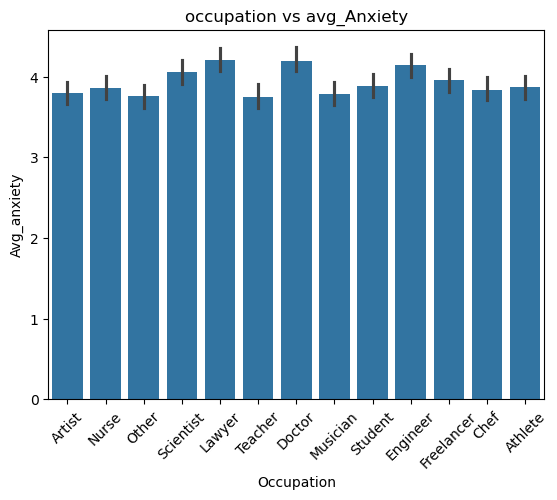

In [29]:
sns.barplot(data=df, x="Occupation", y=df["Anxiety Level (1-10)"])
plt.xticks(rotation=45)
plt.xlabel("Occupation")
plt.ylabel("Avg_anxiety")
plt.title("occupation vs avg_Anxiety")


In [30]:
sleep_anxiety=pd.DataFrame()
sleep_anxiety["Anxiety level"]=df["Anxiety Level (1-10)"]
sleep_anxiety["Sleep"]=pd.cut(df["Sleep Hours"], 
                              bins=[0,4,6,8,df["Sleep Hours"].max()], 
                              labels=["Very less", "Less", "Normal(6-8 hrs)", "High(8+ hrs)"], 
                              include_lowest=True)

In [33]:
sleep_anxiety

,Anxiety level,Sleep
0,5.0,Less
1,3.0,Normal(6-8 hrs)
2,1.0,Less
3,2.0,Less
4,1.0,High(8+ hrs)
...,...,...
10995,6.0,Normal(6-8 hrs)
10996,3.0,Normal(6-8 hrs)
10997,4.0,Normal(6-8 hrs)
10998,4.0,Less


Text(0.5, 1.0, 'Sleep vs Anxiety')

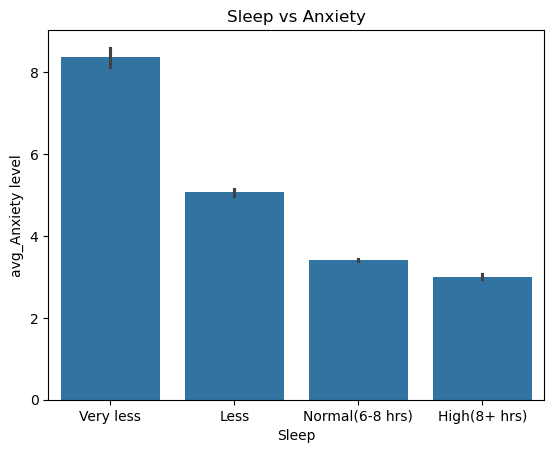

In [35]:
sns.barplot(data=sleep_anxiety, x="Sleep", y="Anxiety level")
plt.xlabel("Sleep")
plt.ylabel("avg_Anxiety level")
plt.title("Sleep vs Anxiety")

In [37]:
phy=pd.DataFrame()
phy["Anxiety_level"]=df["Anxiety Level (1-10)"]
phy["Physical_activity"]=pd.cut(df["Physical Activity (hrs/week)"], bins=[-1,0,2,5,df["Physical Activity (hrs/week)"].max()],
                                        labels=["No physical_activity","Low(0-2 hrs/week)","Medium(2-5 hrs/week)","High(5+hrs)"])

Text(0.5, 1.0, 'Physical_activity vs Anxiety_level')

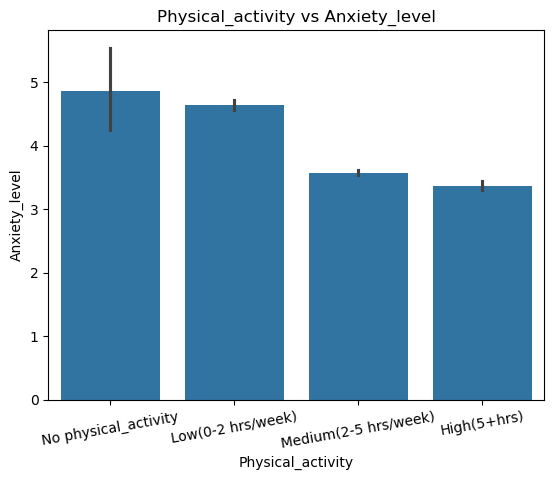

In [39]:
sns.barplot(data=phy, x="Physical_activity", y="Anxiety_level")
plt.xticks(rotation=10)

plt.title("Physical_activity vs Anxiety_level")

In [41]:
caf_anx=pd.DataFrame()
caf_anx["Anxiety level"]=df["Anxiety Level (1-10)"]
caf_anx["Caffeine intake"]=pd.cut(df["Caffeine Intake (mg/day)"],
                                 bins=[0,50,100,250,450,df["Caffeine Intake (mg/day)"].max()],
                                 labels=["very low","low","moderate","high","very high"], include_lowest=True)

In [43]:
alc_anx=pd.DataFrame()
alc_anx["Alcohol consumption"]=pd.cut(df["Alcohol Consumption (drinks/week)"],
                                bins=[-1,0,6,12,15,df["Alcohol Consumption (drinks/week)"].max()],
                                     labels=["No Alcohol","Low","Moderate","High","Very high"])
alc_anx["Anxiety level"]=df["Anxiety Level (1-10)"]

<Axes: xlabel='Alcohol consumption', ylabel='Anxiety level'>

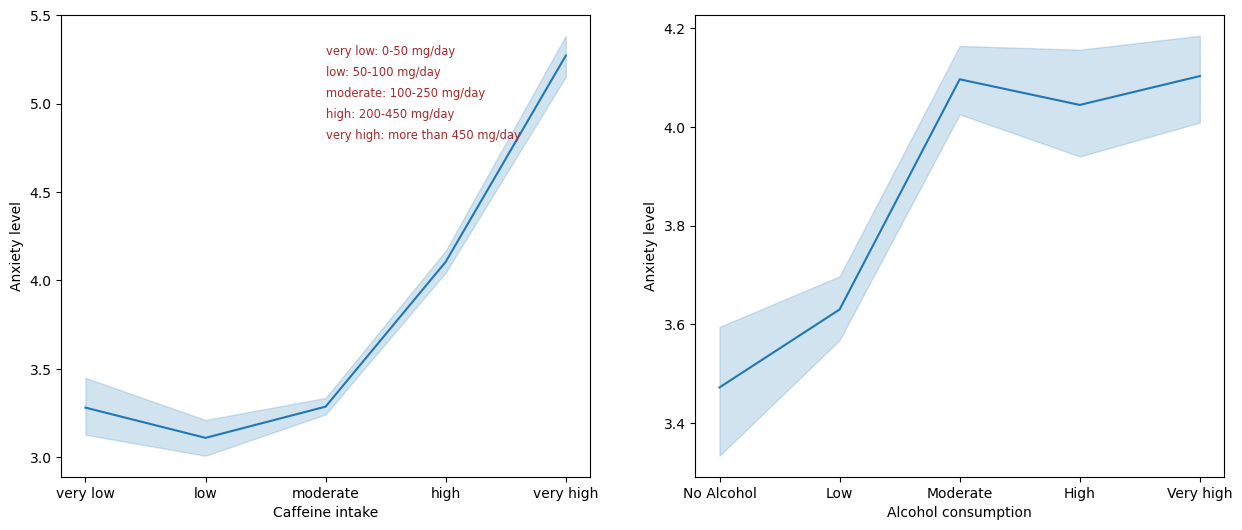

In [49]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.lineplot(data=caf_anx, x=caf_anx["Caffeine intake"], y=caf_anx["Anxiety level"])
plt.text(2,4.8,"very low: 0-50 mg/day \nlow: 50-100 mg/day \nmoderate: 100-250 mg/day \nhigh: 200-450 mg/day \nvery high: more than 450 mg/day", 
         fontsize=8.3, linespacing=1.8, color="brown")

plt.subplot(1,2,2)
sns.lineplot(x=alc_anx["Alcohol consumption"], y=alc_anx["Anxiety level"])

Text(0.5, 0, 'avg_anxiety lvl')

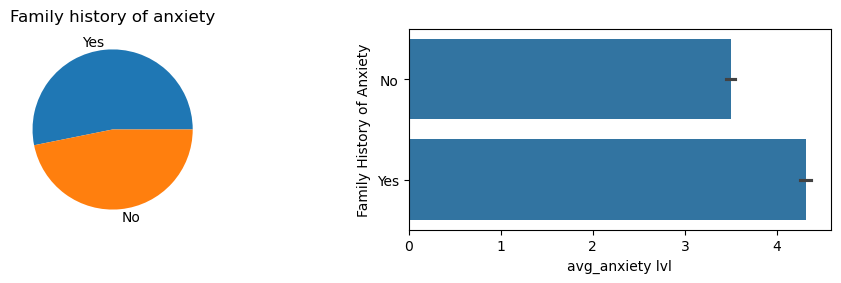

In [95]:
plt.figure(figsize=(12,2.6))

plt.subplot(1,2,1)
plt.pie(x=df["Family History of Anxiety"].value_counts(), labels=df["Family History of Anxiety"].value_counts().index)
plt.title("Family history of anxiety")

plt.subplot(1,2,2)
sns.barplot(y=df["Family History of Anxiety"], x=df["Anxiety Level (1-10)"])
plt.xlabel("avg_anxiety lvl")

In [141]:
heart_anx=pd.DataFrame()
heart_anx["Anx_lvl"]=pd.cut(df["Anxiety Level (1-10)"], bins=[0,4,7,10], labels=["Low (0-4)", "High (4-7)","Very high (7-10)"], include_lowest=True)
heart_anx["Heart_rate"]=df["Heart Rate (bpm)"]
print(*"Heart_rate (bpm) wrt Anxiety level")
heart_rate_data=heart_anx.groupby("Anx_lvl", observed=False)["Heart_rate"].mean()
heart_rate_data

H e a r t _ r a t e   ( b p m )   w r t   A n x i e t y   l e v e l


Anx_lvl
Low (0-4)            89.666973
High (4-7)           89.061655
Very high (7-10)    104.630178
Name: Heart_rate, dtype: float64

In [139]:
breath_anx=pd.DataFrame()
breath_anx["Anx_lvl"]=pd.cut(df["Anxiety Level (1-10)"], bins=[0,4,7,10], labels=["Low", "High","Very high"], include_lowest=True)
breath_anx["Breath_rate in breaths/min"]=df["Breathing Rate (breaths/min)"]
print(*"Breathing_rate (breaths/min) wrt Anxiety level")
breath_rate_data=breath_anx.groupby("Anx_lvl", observed=False)["Breath_rate in breaths/min"].mean()
breath_rate_data

B r e a t h i n g _ r a t e   ( b r e a t h s / m i n )   w r t   A n x i e t y   l e v e l


Anx_lvl
Low          20.612103
High         20.556588
Very high    24.489152
Name: Breath_rate in breaths/min, dtype: float64

Text(0.5, 0, 'avg_anxiety lvl')

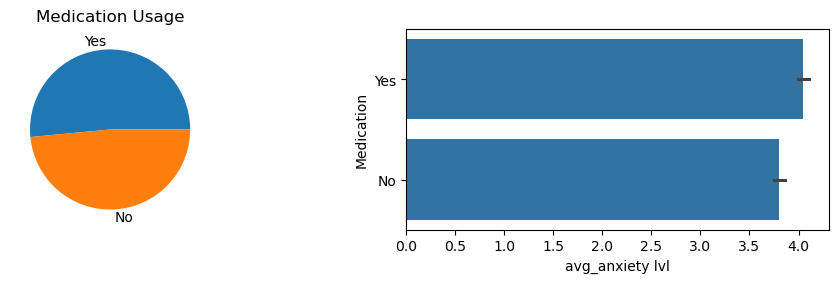

In [143]:
plt.figure(figsize=(12,2.6))

plt.subplot(1,2,1)
plt.pie(x=df["Medication"].value_counts(), labels=df["Medication"].value_counts().index)
plt.title("Medication Usage")

plt.subplot(1,2,2)
sns.barplot(y=df["Medication"], x=df["Anxiety Level (1-10)"])
plt.xlabel("avg_anxiety lvl")

Text(0.5, 1.0, 'Are smokers?')

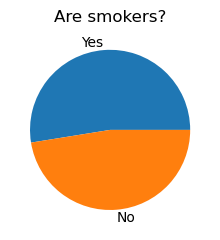

In [145]:
plt.figure(figsize=(12,2.6))

plt.pie(x=df["Smoking"].value_counts(), labels=df["Smoking"].value_counts().index)
plt.title("Are smokers?")


In [167]:
total_people=len(df)
smokers=(df["Smoking"]=="Yes").sum()
percentage_of_smokers=(smokers/total_people)*100
print("percentage_of_smokers:",(percentage_of_smokers).round(2))

percentage_of_smokers: 52.54


In [175]:
Therapy_anx=pd.DataFrame()
Therapy_anx["Therapy_ssn"]=pd.cut(df["Therapy Sessions (per month)"],
                                       bins=[-1,0,df["Therapy Sessions (per month)"].mean(),df["Therapy Sessions (per month)"].max()],
                                       labels=["No Therapy ssn", "less than avg", "more than avg"])
Therapy_anx["avg_Anxiety_lvl"]=df["Anxiety Level (1-10)"]

<Axes: xlabel='Therapy_ssn', ylabel='avg_Anxiety_lvl'>

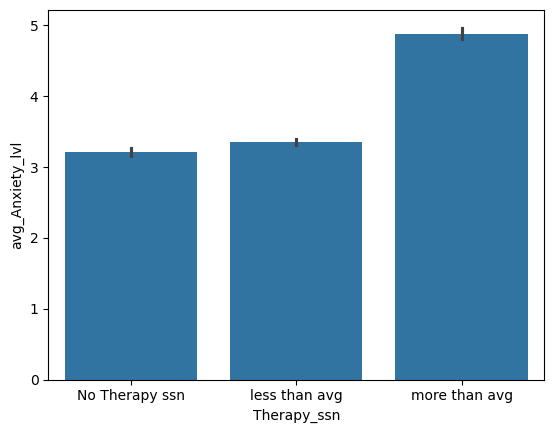

In [179]:
sns.barplot(x=Therapy_anx["Therapy_ssn"], y=Therapy_anx["avg_Anxiety_lvl"])

Text(0.5, 0, 'avg_anxiety lvl')

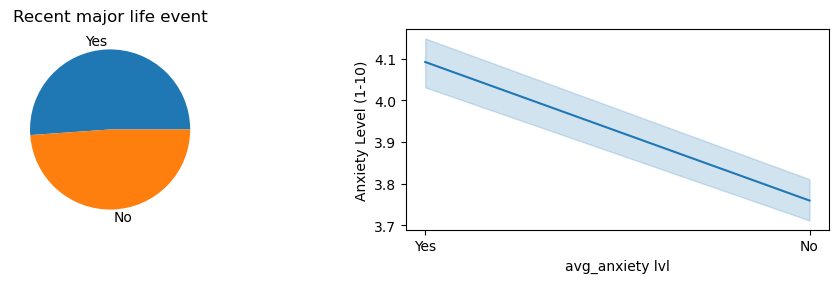

In [199]:
plt.figure(figsize=(12,2.6))

plt.subplot(1,2,1)
plt.pie(x=df["Recent Major Life Event"].value_counts(), labels=df["Recent Major Life Event"].value_counts().index)
plt.title("Recent major life event")

plt.subplot(1,2,2)
sns.lineplot(x=df["Recent Major Life Event"], y=df["Anxiety Level (1-10)"])
plt.xlabel("avg_anxiety lvl")

<Axes: xlabel='Diet Quality (1-10)', ylabel='Anxiety Level (1-10)'>

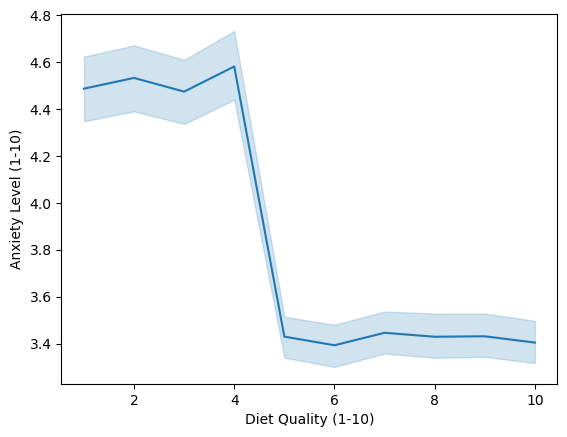

In [195]:
sns.lineplot(x=df["Diet Quality (1-10)"], y=df["Anxiety Level (1-10)"])

## Conclusions are in another file.
Final Summary:

1. Sleep, exercise, and diet significantly impact anxiety levels.

2. Medication and therapy help reduce anxiety but are more common among severe cases.

3. Major life events and family history contribute to higher anxiety.

4. Higher caffeine, alcohol, and smoking levels are linked with increased anxiety.